In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
N = 1000
X = np.random.random((N,2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

The target variable $Y$ is generated using the formula:
$Y = \cos(2x_1) + \cos(3x_2)$
where $x_1$ and $x_2$ are the input features.

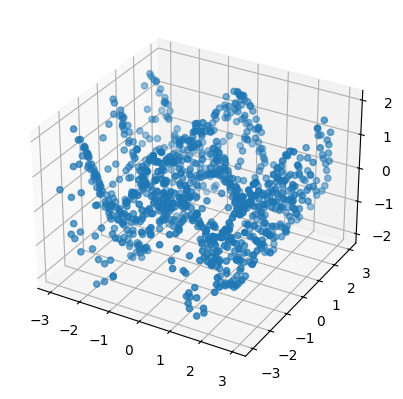

In [12]:

fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [21]:
model = nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [20]:
def full_gd(
        model: nn.Sequential, 
        criterion: nn.MSELoss, 
        optimizer: torch.optim.Adam, 
        X_train, 
        y_train, 
        epochs=1000
    ):
    train_losses = np.zeros(epochs)
    for it in range(epochs):
        optimizer.zero_grad()

        outputs = model(X_train)

        loss = criterion(outputs, y_train)

        loss.backward()
        optimizer.step()

        train_losses[it] = loss.item()

        if (it + 1) % 50 == 0:
            print(f'Epoch {it}/{epochs}, Loss: {loss.item(): .4f}')
    return train_losses

In [22]:
X_train = torch.from_numpy(X.astype(np.float32))
y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1,1))
train_losses = full_gd(model, criterion, optimizer, X_train, y_train)

Epoch 49/1000, Loss:  0.5578
Epoch 99/1000, Loss:  0.2403
Epoch 149/1000, Loss:  0.1089
Epoch 199/1000, Loss:  0.0451
Epoch 249/1000, Loss:  0.0290
Epoch 299/1000, Loss:  0.0099
Epoch 349/1000, Loss:  0.0080
Epoch 399/1000, Loss:  0.0054
Epoch 449/1000, Loss:  0.0045
Epoch 499/1000, Loss:  0.0070
Epoch 549/1000, Loss:  0.0038
Epoch 599/1000, Loss:  0.0034
Epoch 649/1000, Loss:  0.0066
Epoch 699/1000, Loss:  0.0030
Epoch 749/1000, Loss:  0.0036
Epoch 799/1000, Loss:  0.0027
Epoch 849/1000, Loss:  0.0033
Epoch 899/1000, Loss:  0.0034
Epoch 949/1000, Loss:  0.0025
Epoch 999/1000, Loss:  0.0039


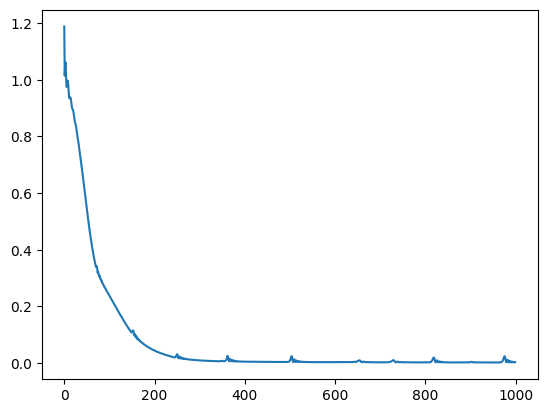

In [23]:
plot.plot(train_losses)

In [26]:
line = np.linspace(-3, 3, 50)
x1, x2 = np.meshgrid(line, line)

In [30]:
Xgrid = np.vstack((x1.flatten(), x2.flatten())).T

In [31]:
Xgrid

array([[-3.        , -3.        ],
       [-2.87755102, -3.        ],
       [-2.75510204, -3.        ],
       ...,
       [ 2.75510204,  3.        ],
       [ 2.87755102,  3.        ],
       [ 3.        ,  3.        ]], shape=(2500, 2))

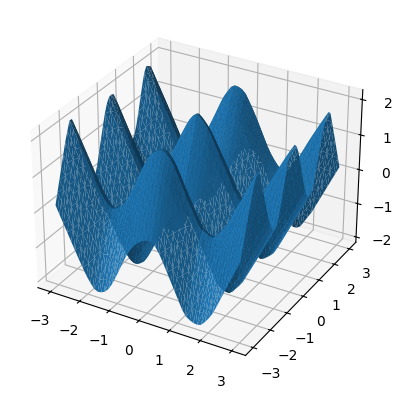

In [37]:
fig = plot.figure()
ax = fig.add_subplot(111, projection='3d')
with torch.no_grad():
    Yhat = model(torch.from_numpy(Xgrid.astype(np.float32))).numpy().flatten()
    ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
    plot.show()